In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# EDA - Doença Renal Crônica

<img src='/data/img/img.png'> </img>

A **doença renal crônica** consiste em lesão renal e perda progressiva e irreversível da função dos rins (glomerular, tubular e endócrina). Em sua fase mais avançada (chamada de fase terminal de insuficiência renal crônica-IRC), os rins não conseguem mais manter a normalidade do meio interno do paciente.

Fonte: [Brazilian Journal of Nephrology](https://www.bjnephrology.org/en/article/doenca-renal-cronica-definicao-epidemiologia-e-classificacao/)

--

Sobre o *dataset*:

O *dataset* utilizado conta com informações de exames clínicos de pacientes de um hospital na Índia que foram coletados num período de **2 meses**. 

Cada instancia da base de dados é classificada com **ckd** ou **not ckd** (possui doença renal crônica/ não possui), além disso conta com outras **23** *features* que estão descritas na tabela a seguir.

[**Link para o dataset**](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease)

#### Tabela de Variáveis
| **Variável**                  | **Abreviação** | **Tipo**    | **Unidade/Valores**                         |
|-------------------------------|---------------|-------------|---------------------------------------------|
| Age                            | age           | Numérico    | anos                                        |
| Blood Pressure                 | bp            | Numérico    | mm/Hg                                       |
| Specific Gravity               | sg            | Nominal     | (1.005, 1.010, 1.015, 1.020, 1.025)         |
| Albumin                        | al            | Nominal     | (0, 1, 2, 3, 4, 5)                          |
| Sugar                          | su            | Nominal     | (0, 1, 2, 3, 4, 5)                          |
| Red Blood Cells                | rbc           | Nominal     | (normal, abnormal)                          |
| Pus Cell                       | pc            | Nominal     | (normal, abnormal)                          |
| Pus Cell Clumps                | pcc           | Nominal     | (present, notpresent)                       |
| Bacteria                       | ba            | Nominal     | (present, notpresent)                       |
| Blood Glucose Random           | bgr           | Numérico    | mgs/dl                                      |
| Blood Urea                     | bu            | Numérico    | mgs/dl                                      |
| Serum Creatinine               | sc            | Numérico    | mgs/dl                                      |
| Sodium                         | sod           | Numérico    | mEq/L                                       |
| Potassium                      | pot           | Numérico    | mEq/L                                       |
| Hemoglobin                     | hemo          | Numérico    | gms                                         |
| Packed Cell Volume             | pcv           | Numérico    |                                             |
| White Blood Cell Count         | wc            | Numérico    | cells/cumm                                  |
| Red Blood Cell Count           | rc            | Numérico    | millions/cmm                                |
| Hypertension                   | htn           | Nominal     | (yes, no)                                   |
| Diabetes Mellitus              | dm            | Nominal     | (yes, no)                                   |
| Coronary Artery Disease        | cad           | Nominal     | (yes, no)                                   |
| Appetite                       | appet         | Nominal     | (good, poor)                                |
| Pedal Edema                    | pe            | Nominal     | (yes, no)                                   |
| Anemia                         | ane           | Nominal     | (yes, no)                                   |
| Class                          | class         | Nominal     | (ckd, notckd)                               |





### Conteúdos
1. [Análise Preliminar](##1-análise-inicial)
2. [Preparação dos dados](#1-análise-inicial)
3. [Descrição Estatística](#1-análise-inicial)
4. [Encontrando Correlações](#1-análise-inicial)
5. [Considerações Finais](#)

---




## 1. Análise Preliminar

In [2]:
df = pd.read_csv('data/kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [3]:
#Dimenssão do dataset
print("Número de linhas: ", df.shape[0])
print("Número de colunas: ", df.shape[1])

Número de linhas:  400
Número de colunas:  26


## 2. Preparação dos dados

In [4]:
#Drop coluna de id
df.drop('id',axis=1 ,inplace=True)

In [5]:
#O nome das colunas estão difíceis de entender então vamos renomeá-las
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Após realizar a análise dos tipos dos dados, percebemos que alguns dados estão representados por tipos incoerentes.

O próximo passo será realizar a transformação destes dados:
- `age` (float64) -> (int64)
- `specific_gravity` (float64) -> nominal (object)
- `albumin` (float64) -> nominal (object)
- `sugar` (float64) -> nominal (object)
- `packed_cell_volume` (object) -> numeric
- `white_blood_cell_count` (object) -> numeric
- `red_blood_cell_count` (object) -> numeric

In [7]:
#Realizar a transformação de tipo dos dados:

#Converter idade float64 -> Int64
df['age'] = df['age'].astype('Int64')

df['specific_gravity'] = df['specific_gravity'].astype('object')
df['albumin'] = df['albumin'].astype('object')
df['sugar'] = df['sugar'].astype('object')


df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    Int64  
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Agora que todos os tipos estão corretos vamos separar os dados em dois grupos, `variáveis categórias` e `variáveis numéricas`, para realizar a análise de distribuição delas.

In [9]:
#Separar features categóricas e numéricas
categ_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

Vamos verificar se os valores das variáveis categóricas estão representados corretamente

In [10]:
#Verificar valores das variáveis categóricas
for col in categ_cols:
    print(f"{col} -> valores: {df[col].unique()}\n")

specific_gravity -> valores: [1.02 1.01 1.005 1.015 nan 1.025]

albumin -> valores: [1.0 4.0 2.0 3.0 0.0 nan 5.0]

sugar -> valores: [0.0 3.0 4.0 1.0 nan 2.0 5.0]

red_blood_cells -> valores: [nan 'normal' 'abnormal']

pus_cell -> valores: ['normal' 'abnormal' nan]

pus_cell_clumps -> valores: ['notpresent' 'present' nan]

bacteria -> valores: ['notpresent' 'present' nan]

hypertension -> valores: ['yes' 'no' nan]

diabetes_mellitus -> valores: ['yes' 'no' ' yes' '\tno' '\tyes' nan]

coronary_artery_disease -> valores: ['no' 'yes' '\tno' nan]

appetite -> valores: ['good' 'poor' nan]

peda_edema -> valores: ['no' 'yes' nan]

anemia -> valores: ['no' 'yes' nan]

class -> valores: ['ckd' 'ckd\t' 'notckd']



>Percebemos que as colunas `diabetes_mellitus`, `coronary_artery_disease` e `class` possuem valores repetidos que precisam ser removidos.

In [11]:
#Removendo valores repetidos
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
for col in ['diabetes_mellitus', 'coronary_artery_disease', 'class']:
    print(f"{col} -> valores: {df[col].unique()}\n")

diabetes_mellitus -> valores: ['yes' 'no' nan]

coronary_artery_disease -> valores: ['no' 'yes' nan]

class -> valores: ['ckd' 'not ckd']



In [13]:
df.head()

age  blood_pressure specific_gravity albumin sugar red_blood_cells  \
0   48            80.0             1.02     1.0   0.0             NaN   
1    7            50.0             1.02     4.0   0.0             NaN   
2   62            80.0             1.01     2.0   3.0          normal   
3   48            70.0            1.005     4.0   0.0          normal   
4   51            80.0             1.01     2.0   0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   peda_edema anemia class  
0          no     no   ckd  
1          no     no   ckd  
2          no    yes   ckd  
3         yes    yes   ckd  
4          no     no   ckd  

[5 rows x 25 columns]

In [14]:
df.describe()

age  blood_pressure  blood_glucose_random  blood_urea  \
count      391.0      388.000000            356.000000  381.000000   
mean   51.483376       76.469072            148.036517   57.425722   
std    17.169714       13.683637             79.281714   50.503006   
min          2.0       50.000000             22.000000    1.500000   
25%         42.0       70.000000             99.000000   27.000000   
50%         55.0       80.000000            121.000000   42.000000   
75%         64.5       80.000000            163.000000   66.000000   
max         90.0      180.000000            490.000000  391.000000   

       serum_creatinine      sodium   potassium  haemoglobin  \
count        383.000000  313.000000  312.000000   348.000000   
mean           3.072454  137.528754    4.627244    12.526437   
std            5.741126   10.408752    3.193904     2.912587   
min            0.400000    4.500000    2.500000     3.100000   
25%            0.900000  135.000000    3.800000    10.300000   
50%            1.300000  138.000000    4.400000    12.650000   
75%            2.800000  142.000000    4.900000    15.000000   
max           76.000000  163.000000   47.000000    17.800000   

       packed_cell_volume  white_blood_cell_count  red_blood_cell_count  
count          329.000000              294.000000            269.000000  
mean            38.884498             8406.122449              4.707435  
std              8.990105             2944.474190              1.025323  
min              9.000000             2200.000000              2.100000  
25%             32.000000             6500.000000              3.900000  
50%             40.000000             8000.000000              4.800000  
75%             45.000000             9800.000000              5.400000  
max             54.000000            26400.000000              8.000000

## 3. Descrição Estatística

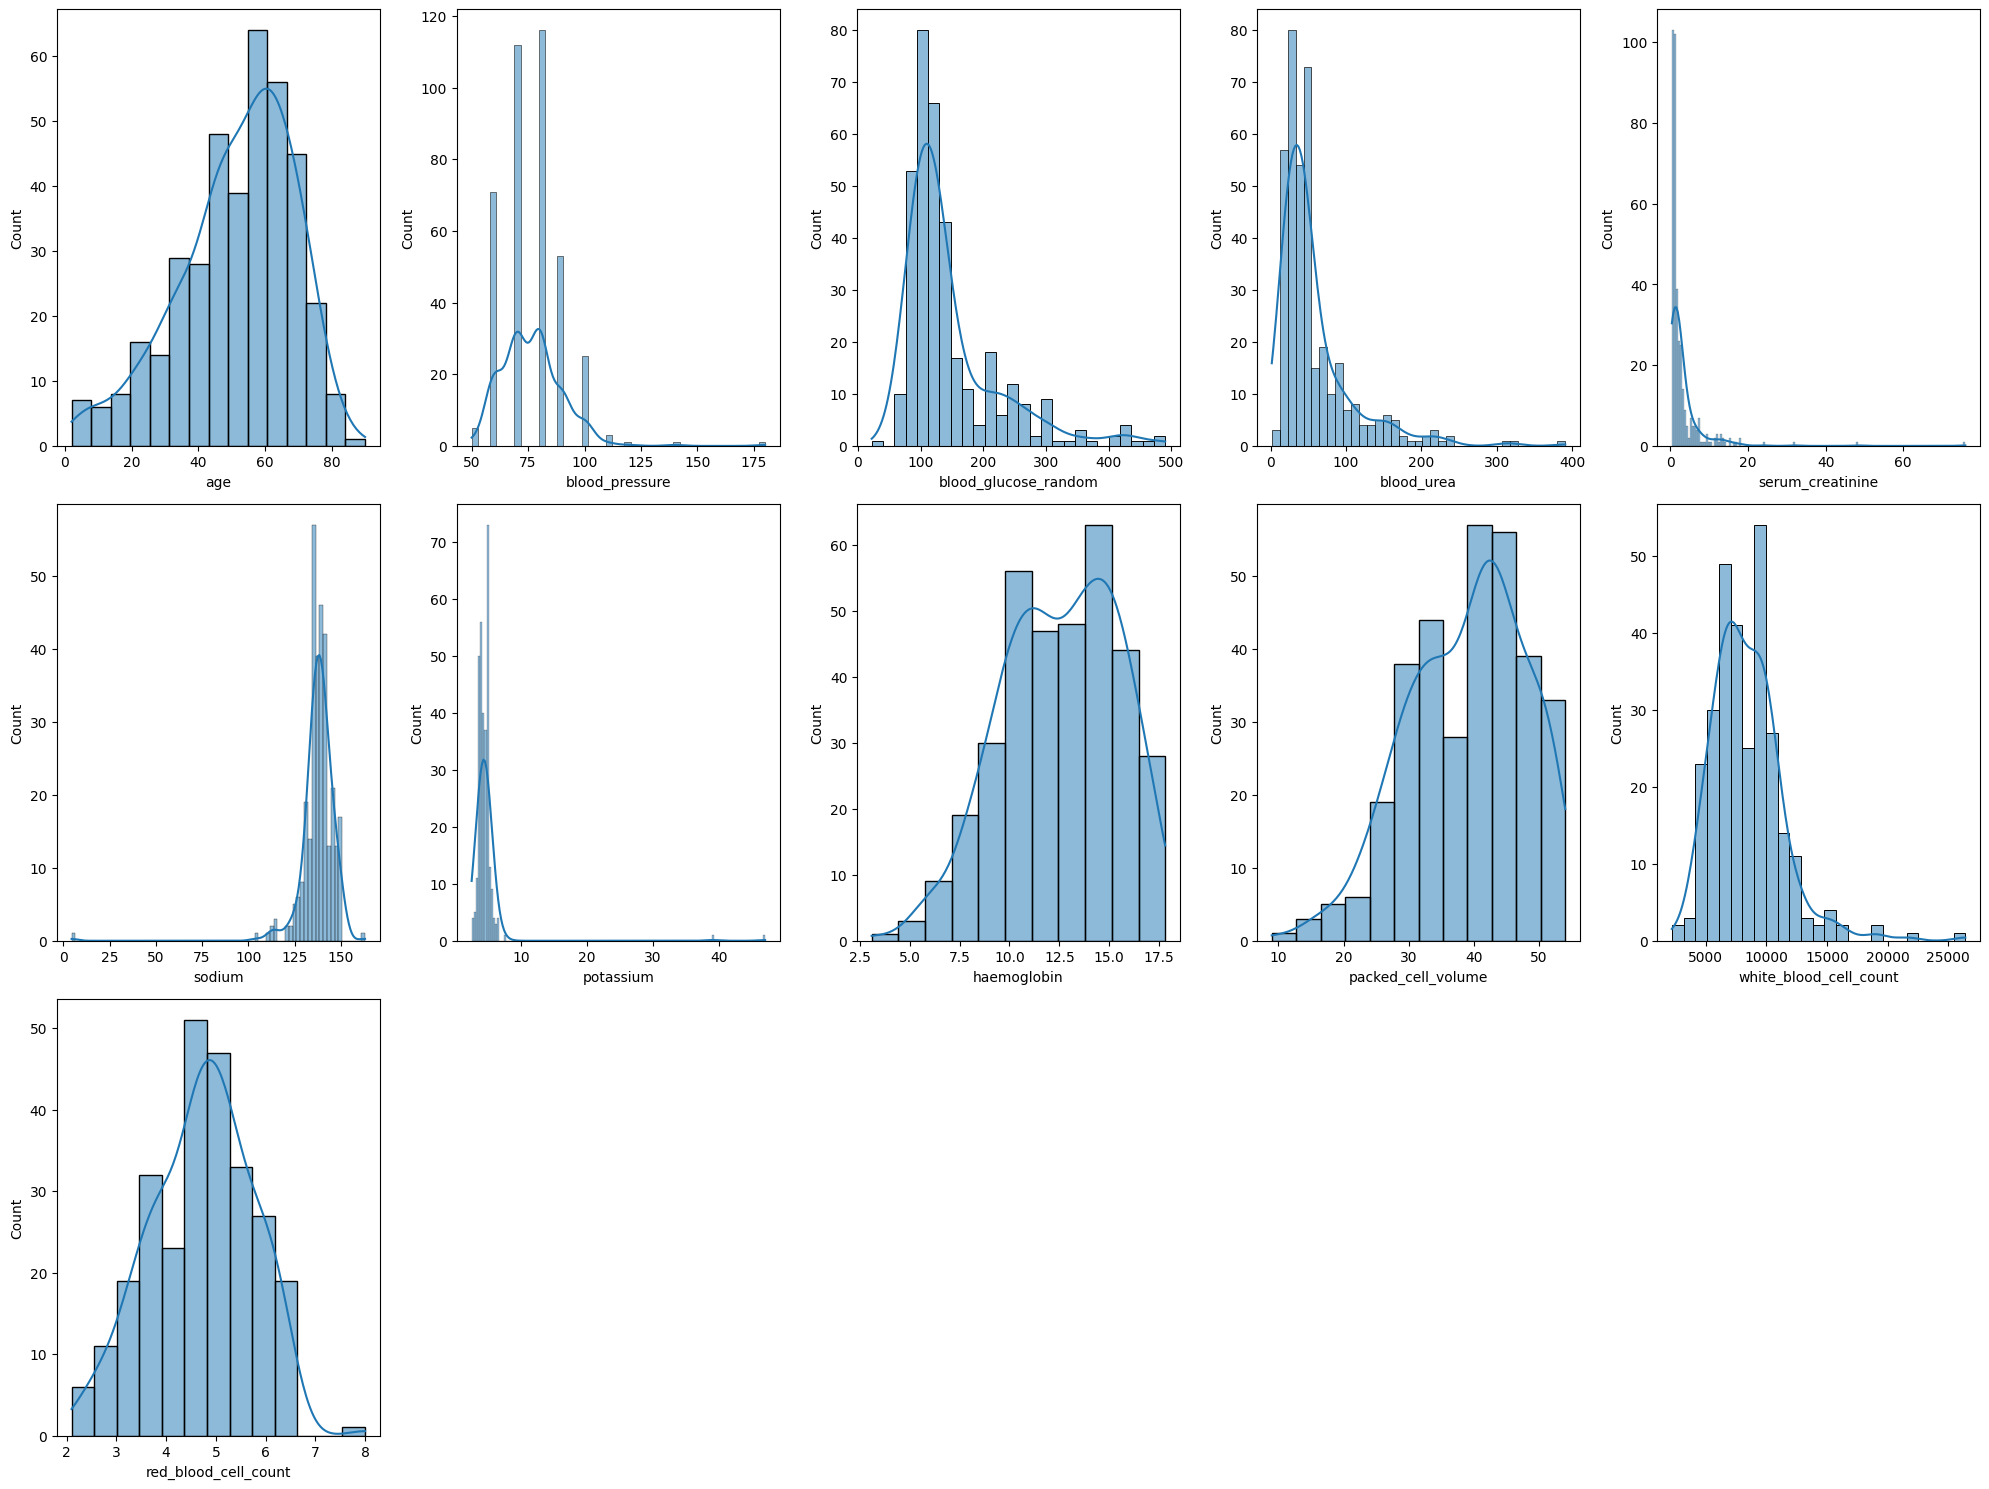

In [15]:
#Distribuição numérica
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numeric_cols:
    ax = plt.subplot(3, 5, plotnumber)
    sns.histplot(x=df[column], ax=ax, kde=True)
    plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

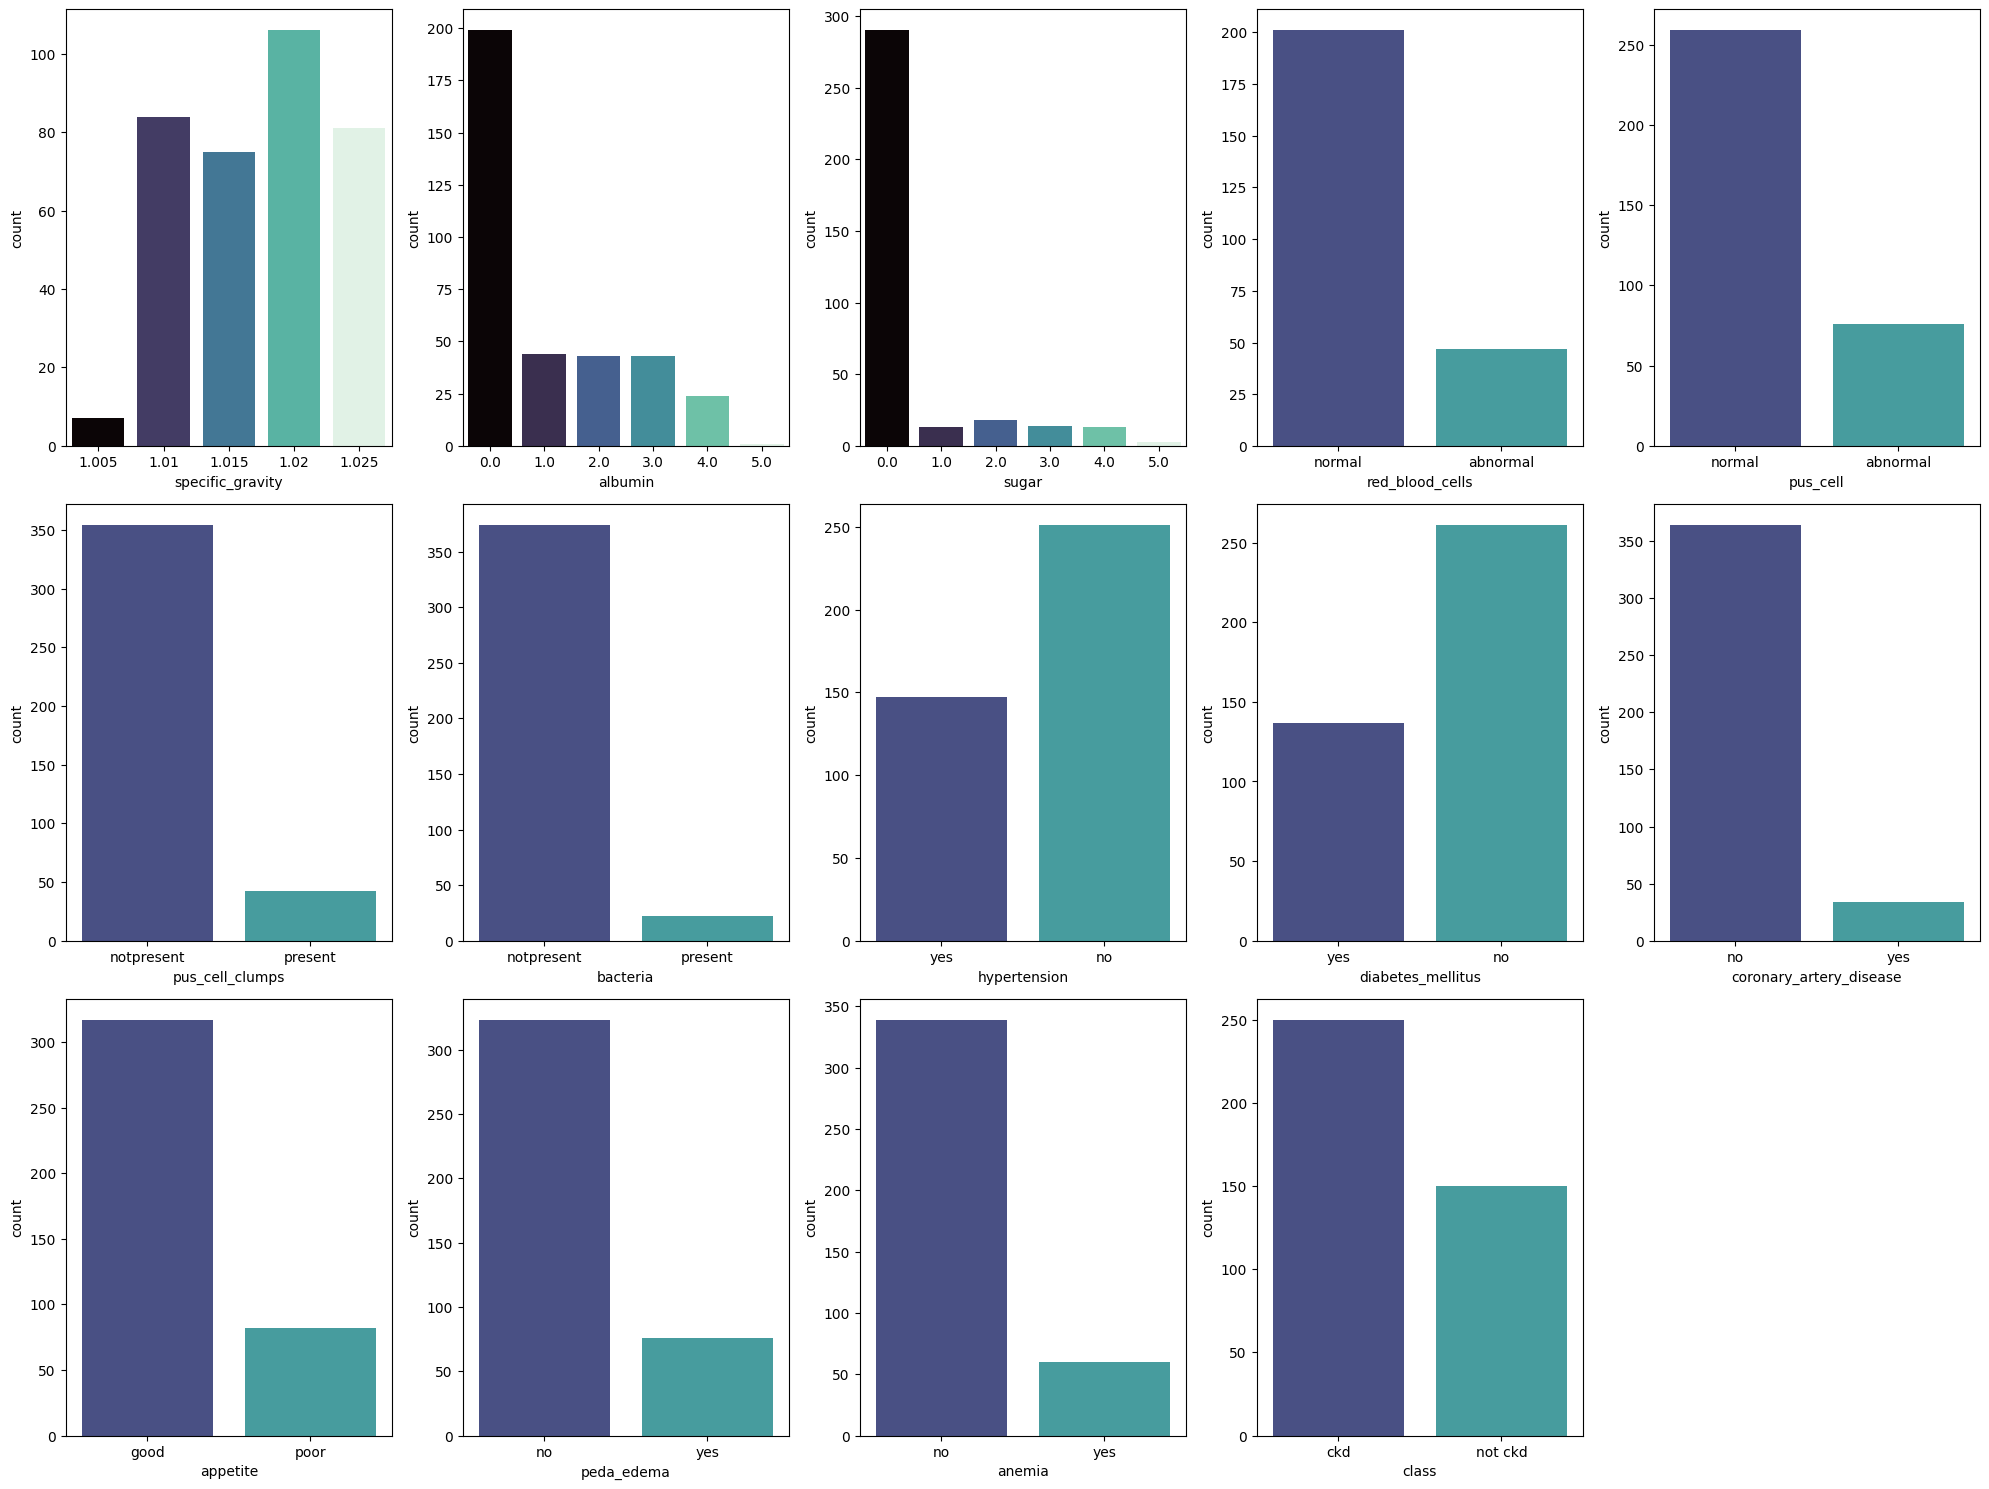

In [16]:
#Distribuição categórica
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categ_cols:
    ax = plt.subplot(3, 5, plotnumber)
    sns.countplot(x=df[column], ax=ax, palette='mako',  hue=df[column] , legend=False)
    plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

## 4. Encontrando Correlações

Antes de prosseguir com os cálculos das correlações, vamos transformar as variáveis categóricas em valores numéricos, para que possamos realizar operações com elas.

In [17]:
#Encoder
encoder = preprocessing.LabelEncoder()
keys = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
         'hypertension', 'diabetes_mellitus' , 'coronary_artery_disease',
           'appetite', 'peda_edema', 'anemia', 'class']

for key in keys:
  df[key] = encoder.fit_transform(df[key])

In [18]:
df.head()

age  blood_pressure specific_gravity albumin sugar  red_blood_cells  \
0   48            80.0             1.02     1.0   0.0                2   
1    7            50.0             1.02     4.0   0.0                2   
2   62            80.0             1.01     2.0   3.0                1   
3   48            70.0            1.005     4.0   0.0                1   
4   51            80.0             1.01     2.0   0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                   NaN  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  anemia  class  
0           0       0      0  
1           0       0      0  
2           0       1      0  
3           1       1      0  
4           0       0      0  

[5 rows x 25 columns]

Vamos restringir o cálculo de correlação apenas para variáveis numéricas e categórica binárias

Então devemos desconsiderar as colunas: `specific_gravity`, `albumin` e `sugar`, que de acordo com a [Tabela de Variáveis](#tabela-de-variáveis) são variáveis nominais não binárias.

In [27]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [28]:
df_rest = df[['age', 'blood_pressure', 
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class']] 

In [29]:
#Cálculo da correlação de Pearson
df_rest.corr('pearson')

age  blood_pressure  red_blood_cells  pus_cell  \
age                      1.000000        0.159480         0.121924  0.030580   
blood_pressure           0.159480        1.000000         0.024923 -0.076983   
red_blood_cells          0.121924        0.024923         1.000000  0.430674   
pus_cell                 0.030580       -0.076983         0.430674  1.000000   
pus_cell_clumps          0.099692        0.021158        -0.075644 -0.335465   
bacteria                -0.010120        0.051808        -0.126138 -0.171667   
blood_glucose_random     0.244992        0.160193         0.018438 -0.168124   
blood_urea               0.196985        0.188517        -0.128008 -0.144145   
serum_creatinine         0.132531        0.146222        -0.017462  0.019027   
sodium                  -0.100046       -0.116422        -0.021008  0.057398   
potassium                0.058377        0.075151        -0.029140 -0.146455   
haemoglobin             -0.192928       -0.306540        -0.061777  0.183745   
packed_cell_volume      -0.242119       -0.326319        -0.014277  0.236819   
white_blood_cell_count   0.118339        0.029753        -0.024369 -0.086824   
red_blood_cell_count    -0.268896       -0.261936        -0.049906  0.258601   
hypertension             0.391885        0.249046         0.110808 -0.066831   
diabetes_mellitus        0.361414        0.207055         0.132903  0.033486   
coronary_artery_disease  0.215681        0.050542        -0.012018 -0.067420   
appetite                 0.172053        0.159945         0.008775 -0.159985   
peda_edema               0.110624        0.038386        -0.051949 -0.187009   
anemia                   0.069250        0.174901         0.007508 -0.106254   
class                   -0.227268       -0.294077        -0.239595  0.114280   

                         pus_cell_clumps  bacteria  blood_glucose_random  \
age                             0.099692 -0.010120              0.244992   
blood_pressure                  0.021158  0.051808              0.160193   
red_blood_cells                -0.075644 -0.126138              0.018438   
pus_cell                       -0.335465 -0.171667             -0.168124   
pus_cell_clumps                 1.000000  0.517293              0.142617   
bacteria                        0.517293  1.000000              0.028481   
blood_glucose_random            0.142617  0.028481              1.000000   
blood_urea                      0.124592  0.081303              0.143322   
serum_creatinine                0.018108  0.009293              0.114875   
sodium                         -0.112280 -0.033494             -0.267848   
potassium                      -0.012172 -0.008522              0.066966   
haemoglobin                    -0.209740 -0.120944             -0.306189   
packed_cell_volume             -0.205318 -0.082583             -0.301385   
white_blood_cell_count          0.140081  0.067655              0.150015   
red_blood_cell_count           -0.182587 -0.061596             -0.281541   
hypertension                    0.114093  0.011404              0.364856   
diabetes_mellitus               0.090779  0.007281              0.495720   
coronary_artery_disease         0.117786  0.085028              0.178084   
appetite                        0.126097  0.074845              0.174455   
peda_edema                      0.056127  0.065451              0.099271   
anemia                          0.117805  0.007937              0.127487   
class                          -0.154336 -0.056138             -0.419672   

                         blood_urea  serum_creatinine    sodium  ...  \
age                        0.196985          0.132531 -0.100046  ...   
blood_pressure             0.188517          0.146222 -0.116422  ...   
red_blood_cells           -0.128008         -0.017462 -0.021008  ...   
pus_cell                  -0.144145          0.019027  0.057398  ...   
pus_cell_clumps            0.124592          0.018108 -0.112280  ...   
bacteria

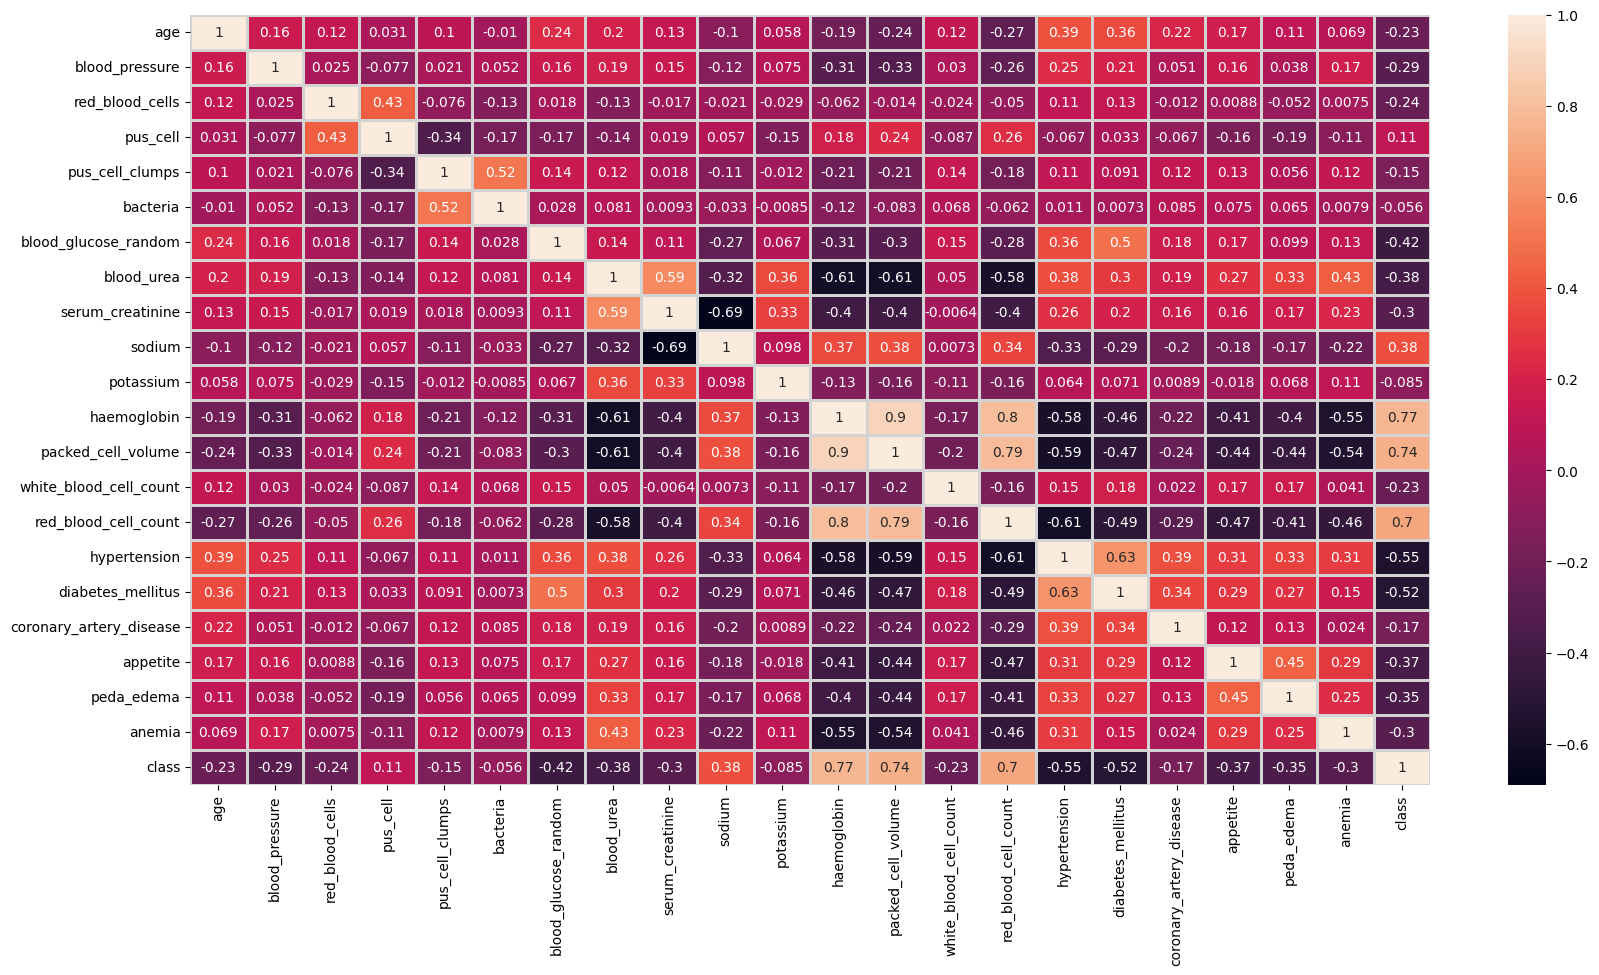

In [30]:
plt.figure(figsize = (20, 10))

sns.heatmap(df_rest.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

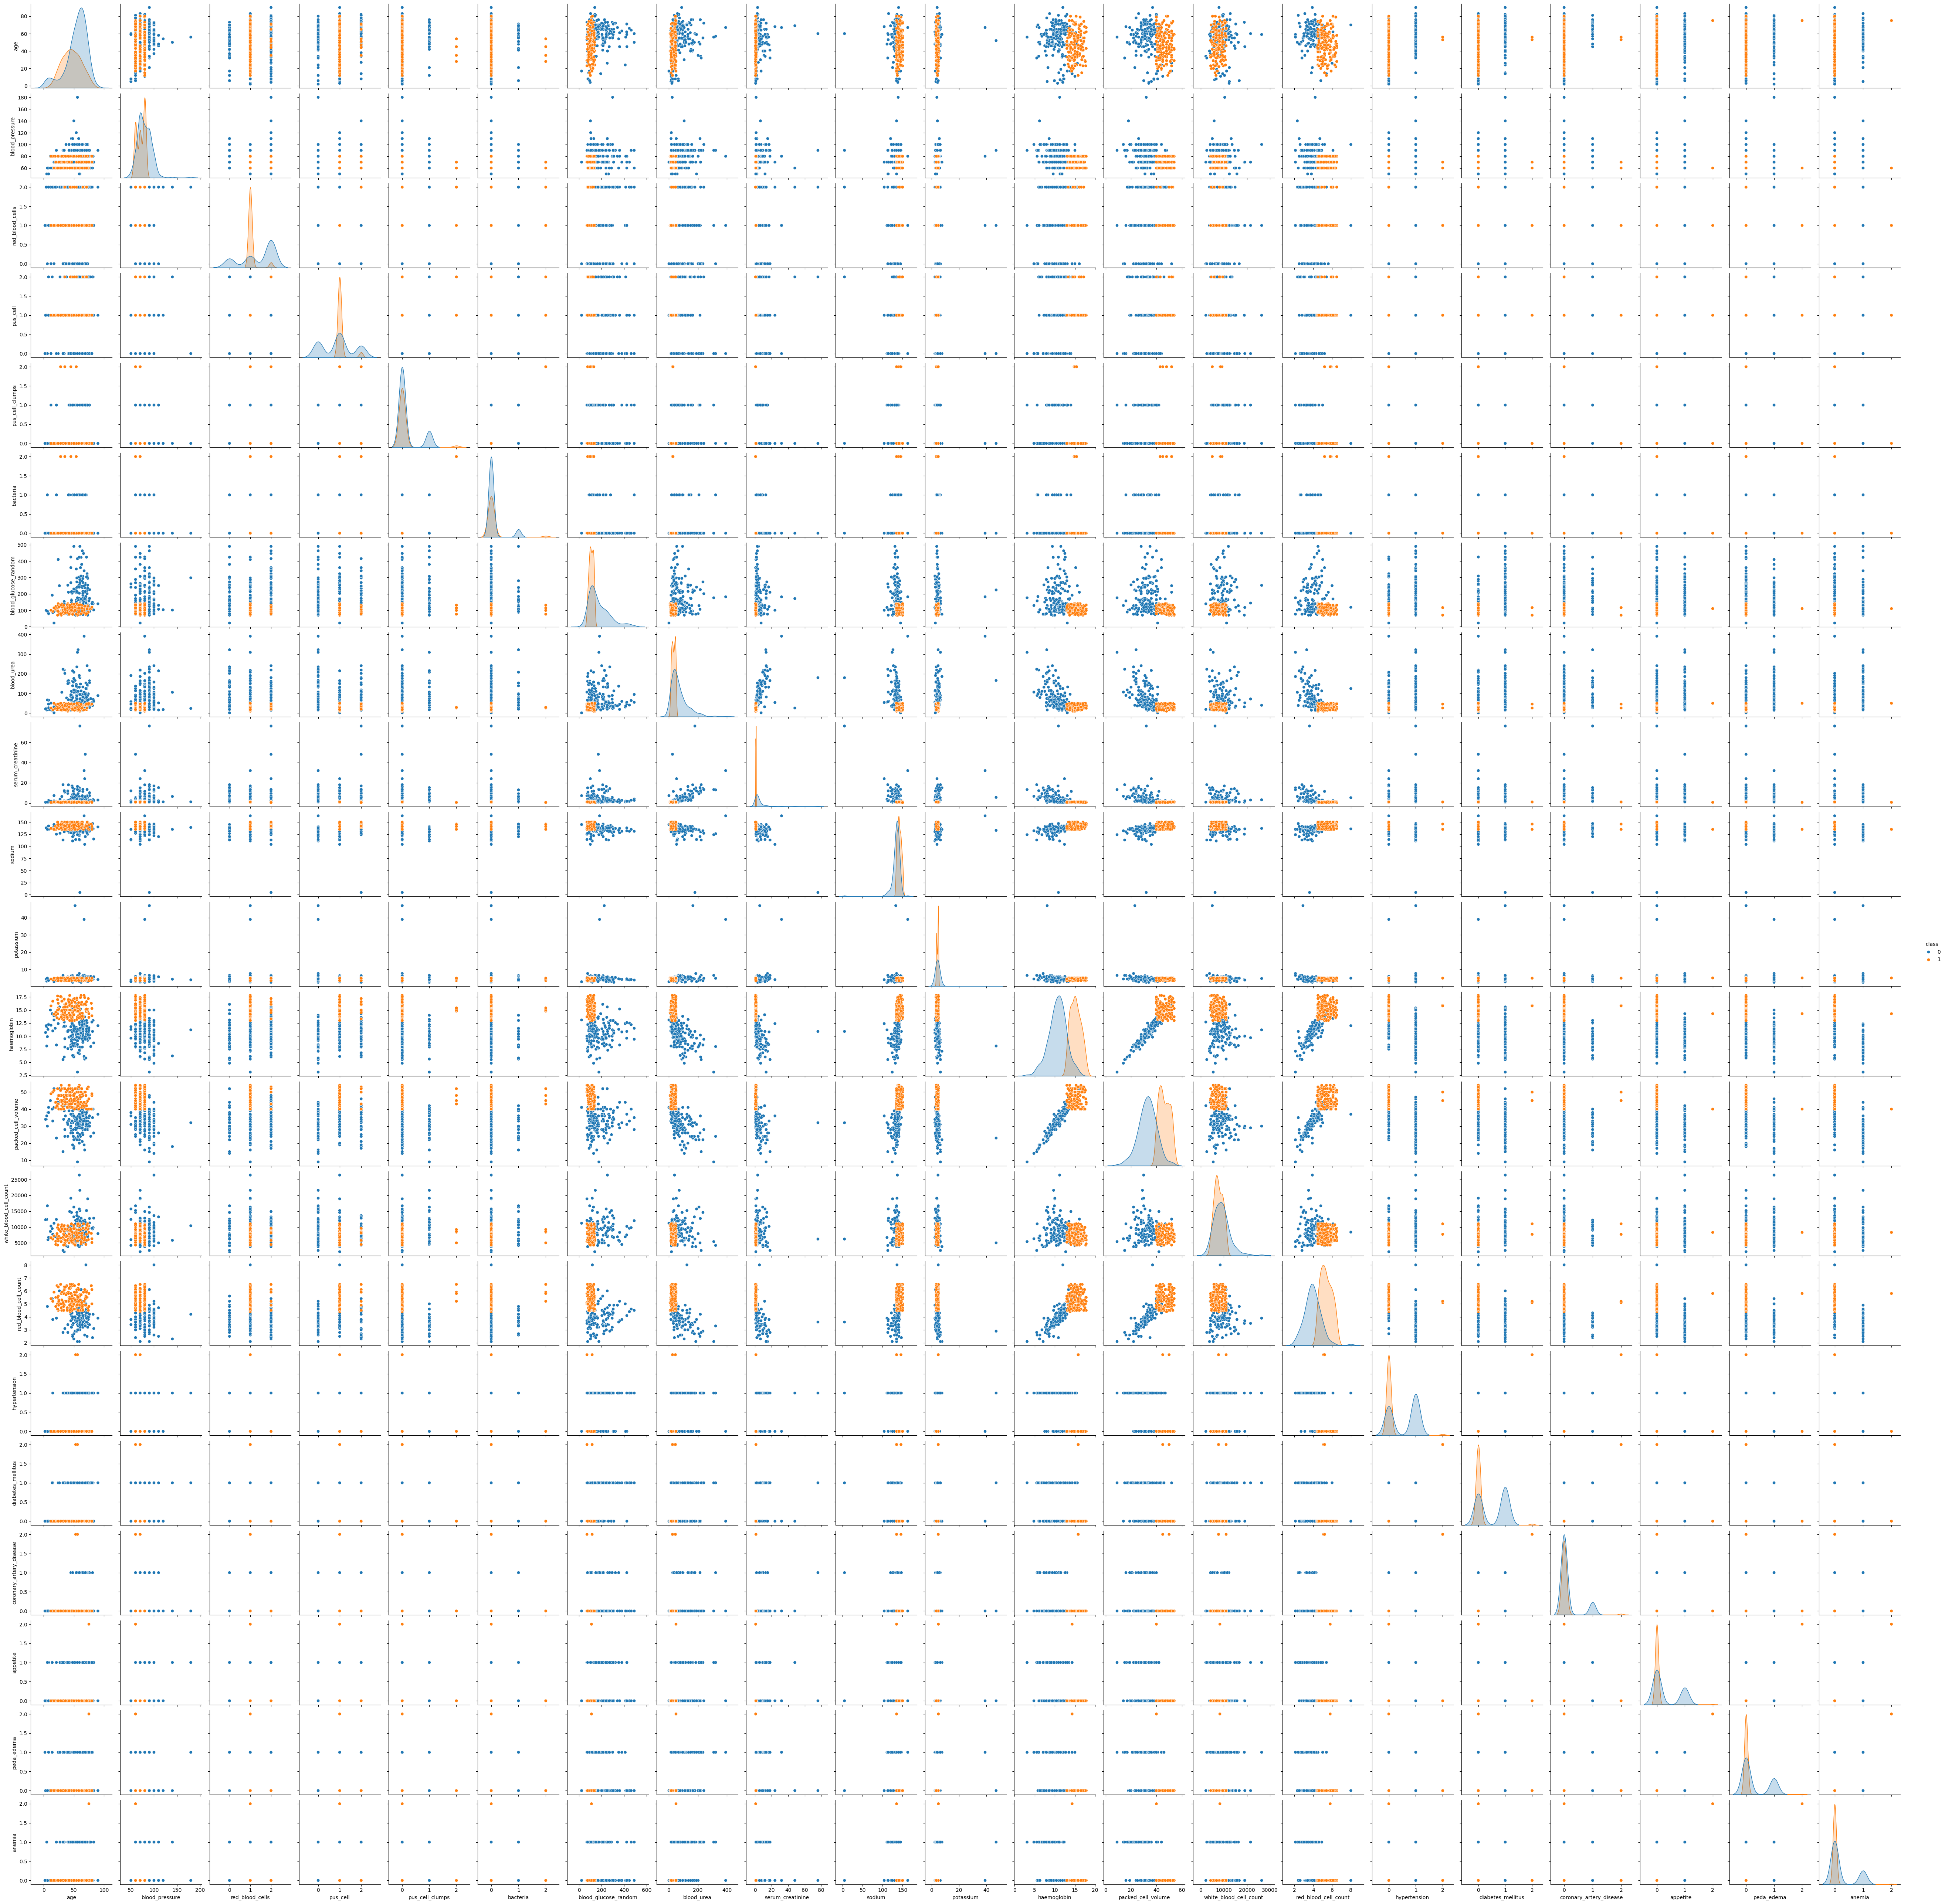

In [31]:
sns.pairplot(df_rest, hue="class")